In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = (
    "cuda" if torch.cuda.is_available() else 
    "mps" if torch.backends.mps.is_available() else "cpu"
)
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
import matplotlib.pyplot as plt

def show_image(tensor):
    # Convert the tensor to a NumPy array and remove any single-dimensional entries
    image = tensor.squeeze().cpu().detach().numpy()

    # Display the image using matplotlib
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()


In [6]:
X = torch.rand(1, 28, 28, device=device)

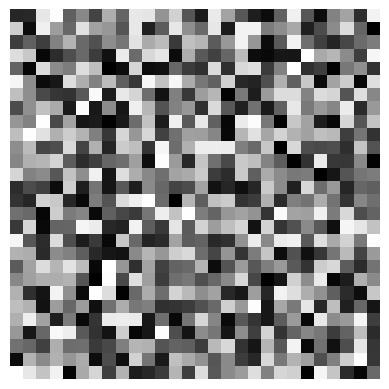

In [7]:
show_image(X)

In [8]:
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)

In [10]:
logits

tensor([[-0.0762, -0.0762,  0.0200,  0.0503,  0.0113, -0.0332,  0.0587, -0.0059,
          0.0276,  0.1030]], grad_fn=<AddmmBackward0>)

In [11]:
pred_probab

tensor([[0.0918, 0.0918, 0.1011, 0.1042, 0.1002, 0.0958, 0.1050, 0.0985, 0.1018,
         0.1098]], grad_fn=<SoftmaxBackward0>)

In [12]:
y_pred

tensor([9])

In [15]:
print(f"Predicted class: {y_pred.item()}")

Predicted class: 9


# Testting FashionMNIST model

## Create a batch of 3 images 28x28

In [19]:
input_image = torch.rand(3,28,28)

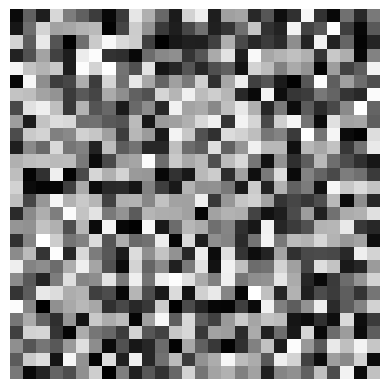

In [25]:
show_image(input_image[1])

## Flatten the images
We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values

In [26]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

In [29]:
flat_image

tensor([[0.7769, 0.4372, 0.7297,  ..., 0.6061, 0.1965, 0.9064],
        [0.0423, 0.3817, 0.1223,  ..., 0.9461, 0.0452, 0.7559],
        [0.5202, 0.4208, 0.5009,  ..., 0.1683, 0.8118, 0.2311]])

In [30]:
# Creates layer 1
layer1 = nn.Linear(in_features=28*28, out_features=20)

# Pass flatened image through layer 1
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [34]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.4360,  0.1085,  0.1106,  0.1953,  0.1130, -0.2292,  0.1454,  0.5224,
         -0.5608,  0.1884, -0.3556,  0.1560, -0.0892,  0.1550, -0.0469, -0.1570,
         -0.7833,  0.0854, -0.0206,  0.2918],
        [-0.3986,  0.3361,  0.1137, -0.0070, -0.0766, -0.2636,  0.2313,  0.2418,
         -0.4774, -0.0963, -0.3627, -0.2623,  0.0751,  0.1299,  0.1832, -0.2319,
         -0.6678,  0.2547,  0.0949,  0.1678],
        [ 0.1630,  0.6507,  0.3589, -0.0930, -0.1221,  0.1049,  0.0045,  0.5850,
         -0.3027, -0.0362, -0.2948,  0.0199, -0.1231, -0.0386,  0.1364, -0.3910,
         -0.4332,  0.2936,  0.1117,  0.1400]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.1085, 0.1106, 0.1953, 0.1130, 0.0000, 0.1454, 0.5224, 0.0000,
         0.1884, 0.0000, 0.1560, 0.0000, 0.1550, 0.0000, 0.0000, 0.0000, 0.0854,
         0.0000, 0.2918],
        [0.0000, 0.3361, 0.1137, 0.0000, 0.0000, 0.0000, 0.2313, 0.2418, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0751, 0.1299, 0.18

# nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [38]:
# Creates the container
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

# Create a new batch of 3 images
input_image = torch.rand(3,28,28)

# Store the final results
logits = seq_modules(input_image)

In [39]:
logits

tensor([[-0.1533, -0.0845, -0.0153, -0.2542, -0.1884, -0.1674,  0.2516, -0.2270,
          0.3155, -0.1679],
        [-0.2156, -0.1282, -0.1049, -0.1977, -0.1779, -0.1593,  0.3002, -0.0966,
          0.3061, -0.1738],
        [-0.1221, -0.0743, -0.3077, -0.2183, -0.2230, -0.1221,  0.2228, -0.0305,
          0.2440, -0.2325]], grad_fn=<AddmmBackward0>)

# The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [43]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [44]:
pred_probab

tensor([[0.0902, 0.0966, 0.1035, 0.0815, 0.0871, 0.0889, 0.1352, 0.0838, 0.1441,
         0.0889],
        [0.0844, 0.0921, 0.0943, 0.0859, 0.0876, 0.0893, 0.1413, 0.0950, 0.1422,
         0.0880],
        [0.0949, 0.0995, 0.0788, 0.0862, 0.0858, 0.0949, 0.1340, 0.1040, 0.1369,
         0.0850]], grad_fn=<SoftmaxBackward0>)

In [45]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0272,  0.0258, -0.0078,  ...,  0.0004,  0.0254, -0.0070],
        [-0.0287, -0.0199, -0.0352,  ...,  0.0344, -0.0054, -0.0015]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0058, -0.0334], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0070,  0.0244,  0.0218,  ...,  0.0349,  0.0007, -0.0142],
        [-0.0094, -0.0102,  0.0428,  ...,  0.0386, -0.0320, -0.0274]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

# Automatic Differentiation with torch.autograd

In [46]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [48]:
x

tensor([1., 1., 1., 1., 1.])

In [49]:
y

tensor([0., 0., 0.])

In [50]:
w

tensor([[ 7.4669e-01, -7.3470e-01, -8.2498e-01],
        [ 4.5920e-01,  6.9379e-01,  1.8957e+00],
        [ 1.8866e+00, -1.7621e-01,  4.2464e-01],
        [ 7.5770e-04, -6.6432e-01, -8.1674e-01],
        [-1.8108e-01, -3.2115e-01,  8.0039e-02]], requires_grad=True)

In [51]:
b

tensor([-0.8552,  0.7549, -0.0402], requires_grad=True)

In [52]:
z

tensor([ 2.0570, -0.4477,  0.7185], grad_fn=<AddBackward0>)

In [53]:
loss

tensor(1.2623, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [54]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7f885d3855d0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7f885d3854b0>


# Computing Gradients

In [55]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2956, 0.1300, 0.2241],
        [0.2956, 0.1300, 0.2241],
        [0.2956, 0.1300, 0.2241],
        [0.2956, 0.1300, 0.2241],
        [0.2956, 0.1300, 0.2241]])
tensor([0.2956, 0.1300, 0.2241])


# Optimizing Model Parameters

In [57]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [95]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [96]:
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [97]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [98]:
loss

tensor(1.2623, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [99]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [100]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [101]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.023883  [   64/60000]
loss: 1.951588  [ 6464/60000]
loss: 1.832123  [12864/60000]
loss: 1.939985  [19264/60000]
loss: 1.834798  [25664/60000]
loss: 1.985217  [32064/60000]
loss: 1.940525  [38464/60000]
loss: 1.966132  [44864/60000]
loss: 2.029403  [51264/60000]
loss: 2.085068  [57664/60000]
Test Error: 
 Accuracy: 26.6%, Avg loss: 1.925396 

Epoch 2
-------------------------------
loss: 2.023447  [   64/60000]
loss: 1.950758  [ 6464/60000]
loss: 1.832258  [12864/60000]
loss: 1.939161  [19264/60000]
loss: 1.817561  [25664/60000]
loss: 1.985834  [32064/60000]
loss: 1.936544  [38464/60000]
loss: 1.966138  [44864/60000]
loss: 2.028090  [51264/60000]
loss: 2.083169  [57664/60000]
Test Error: 
 Accuracy: 26.7%, Avg loss: 1.925186 

Epoch 3
-------------------------------
loss: 2.023035  [   64/60000]
loss: 1.950366  [ 6464/60000]
loss: 1.832384  [12864/60000]
loss: 1.938383  [19264/60000]
loss: 1.804648  [25664/60000]
loss: 1.984340  [32064/600

# Autograd

In [102]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [104]:
# Create a sequence of number from 0 to 2*PI
a = torch.linspace(0., 2. * math.pi, steps=100, requires_grad=True)
print(a)

tensor([0.0000, 0.0635, 0.1269, 0.1904, 0.2539, 0.3173, 0.3808, 0.4443, 0.5077,
        0.5712, 0.6347, 0.6981, 0.7616, 0.8251, 0.8885, 0.9520, 1.0155, 1.0789,
        1.1424, 1.2059, 1.2693, 1.3328, 1.3963, 1.4597, 1.5232, 1.5867, 1.6501,
        1.7136, 1.7771, 1.8405, 1.9040, 1.9675, 2.0309, 2.0944, 2.1579, 2.2213,
        2.2848, 2.3483, 2.4117, 2.4752, 2.5387, 2.6021, 2.6656, 2.7291, 2.7925,
        2.8560, 2.9195, 2.9829, 3.0464, 3.1099, 3.1733, 3.2368, 3.3003, 3.3637,
        3.4272, 3.4907, 3.5541, 3.6176, 3.6811, 3.7445, 3.8080, 3.8715, 3.9349,
        3.9984, 4.0619, 4.1253, 4.1888, 4.2523, 4.3157, 4.3792, 4.4427, 4.5061,
        4.5696, 4.6331, 4.6965, 4.7600, 4.8235, 4.8869, 4.9504, 5.0139, 5.0773,
        5.1408, 5.2043, 5.2677, 5.3312, 5.3947, 5.4581, 5.5216, 5.5851, 5.6485,
        5.7120, 5.7755, 5.8389, 5.9024, 5.9659, 6.0293, 6.0928, 6.1563, 6.2197,
        6.2832], requires_grad=True)


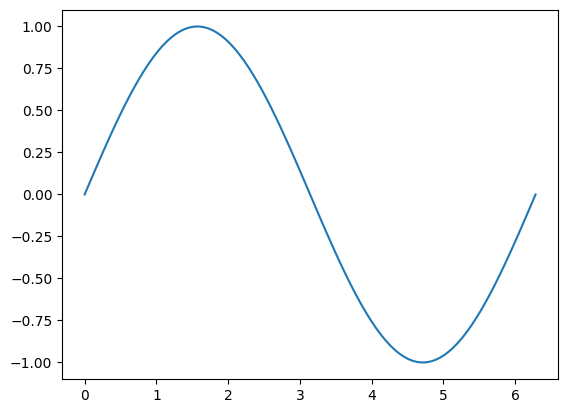

In [156]:
# Evaluate the previous generated numbers with sin
b = torch.sin(a)
plt.plot(a.detach(), b.detach()) # detach gets a copy of the tensor with no gradient tracking
# implicit conversion from a PyTorch tensor to a NumPy array is not enabled for tensors with 
# requires_grad=True. Making a detached copy lets us move forward.

In [109]:
# Now let's see what is the derivative the autograd function chooses based on our choosen function
# The answer is "SinBackward0" witch ahead we will see that is cossine function
print(b)

tensor([ 0.0000e+00,  6.3424e-02,  1.2659e-01,  1.8925e-01,  2.5115e-01,
         3.1203e-01,  3.7166e-01,  4.2979e-01,  4.8620e-01,  5.4064e-01,
         5.9291e-01,  6.4279e-01,  6.9008e-01,  7.3459e-01,  7.7615e-01,
         8.1458e-01,  8.4973e-01,  8.8145e-01,  9.0963e-01,  9.3415e-01,
         9.5490e-01,  9.7181e-01,  9.8481e-01,  9.9384e-01,  9.9887e-01,
         9.9987e-01,  9.9685e-01,  9.8982e-01,  9.7880e-01,  9.6384e-01,
         9.4500e-01,  9.2235e-01,  8.9599e-01,  8.6603e-01,  8.3257e-01,
         7.9576e-01,  7.5575e-01,  7.1269e-01,  6.6677e-01,  6.1816e-01,
         5.6706e-01,  5.1368e-01,  4.5823e-01,  4.0093e-01,  3.4202e-01,
         2.8173e-01,  2.2031e-01,  1.5800e-01,  9.5056e-02,  3.1728e-02,
        -3.1728e-02, -9.5056e-02, -1.5800e-01, -2.2031e-01, -2.8173e-01,
        -3.4202e-01, -4.0093e-01, -4.5823e-01, -5.1368e-01, -5.6706e-01,
        -6.1816e-01, -6.6677e-01, -7.1269e-01, -7.5575e-01, -7.9576e-01,
        -8.3257e-01, -8.6603e-01, -8.9599e-01, -9.2

In [112]:
# Lets add some more steps to it

c = 2 * b
print(c)

d = c + 1
print(d)

# Note that each tensor has its respective backwards function

tensor([ 0.0000e+00,  1.2685e-01,  2.5318e-01,  3.7850e-01,  5.0230e-01,
         6.2407e-01,  7.4332e-01,  8.5959e-01,  9.7239e-01,  1.0813e+00,
         1.1858e+00,  1.2856e+00,  1.3802e+00,  1.4692e+00,  1.5523e+00,
         1.6292e+00,  1.6995e+00,  1.7629e+00,  1.8193e+00,  1.8683e+00,
         1.9098e+00,  1.9436e+00,  1.9696e+00,  1.9877e+00,  1.9977e+00,
         1.9997e+00,  1.9937e+00,  1.9796e+00,  1.9576e+00,  1.9277e+00,
         1.8900e+00,  1.8447e+00,  1.7920e+00,  1.7321e+00,  1.6651e+00,
         1.5915e+00,  1.5115e+00,  1.4254e+00,  1.3335e+00,  1.2363e+00,
         1.1341e+00,  1.0274e+00,  9.1645e-01,  8.0186e-01,  6.8404e-01,
         5.6347e-01,  4.4062e-01,  3.1600e-01,  1.9011e-01,  6.3456e-02,
        -6.3456e-02, -1.9011e-01, -3.1600e-01, -4.4062e-01, -5.6347e-01,
        -6.8404e-01, -8.0186e-01, -9.1645e-01, -1.0274e+00, -1.1341e+00,
        -1.2363e+00, -1.3335e+00, -1.4254e+00, -1.5115e+00, -1.5915e+00,
        -1.6651e+00, -1.7321e+00, -1.7920e+00, -1.8

In [113]:
out = d.sum()
print(out)

tensor(100.0000, grad_fn=<SumBackward0>)


In [116]:
# These tensors keep track of their origin tensors this way they can compute the gradients needed
# D backward function
print(d.grad_fn)

In [126]:
# C backward function
print(d.grad_fn.next_functions)
c.grad_fn

((<MulBackward0 object at 0x7f885c6d4700>, 0), (None, 0))


In [128]:
# B backward function
print(d.grad_fn.next_functions[0][0].next_functions)
b.grad_fn

((<SinBackward0 object at 0x7f885c6d4580>, 0), (None, 0))


In [136]:
# A backward function (None)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(a.grad_fn)

((<AccumulateGrad object at 0x7f885c6d4220>, 0),)
None


tensor([ 2.0000,  1.9960,  1.9839,  1.9639,  1.9359,  1.9001,  1.8567,  1.8059,
         1.7477,  1.6825,  1.6105,  1.5321,  1.4475,  1.3570,  1.2611,  1.1601,
         1.0545,  0.9445,  0.8308,  0.7138,  0.5938,  0.4715,  0.3473,  0.2217,
         0.0952, -0.0317, -0.1585, -0.2846, -0.4096, -0.5329, -0.6541, -0.7727,
        -0.8881, -1.0000, -1.1078, -1.2112, -1.3097, -1.4029, -1.4905, -1.5721,
        -1.6474, -1.7160, -1.7777, -1.8322, -1.8794, -1.9190, -1.9509, -1.9749,
        -1.9909, -1.9990, -1.9990, -1.9909, -1.9749, -1.9509, -1.9190, -1.8794,
        -1.8322, -1.7777, -1.7160, -1.6474, -1.5721, -1.4905, -1.4029, -1.3097,
        -1.2112, -1.1078, -1.0000, -0.8881, -0.7727, -0.6541, -0.5329, -0.4096,
        -0.2846, -0.1585, -0.0317,  0.0952,  0.2217,  0.3473,  0.4715,  0.5938,
         0.7138,  0.8308,  0.9445,  1.0545,  1.1601,  1.2611,  1.3570,  1.4475,
         1.5321,  1.6105,  1.6825,  1.7477,  1.8059,  1.8567,  1.9001,  1.9359,
         1.9639,  1.9839,  1.9960,  2.00

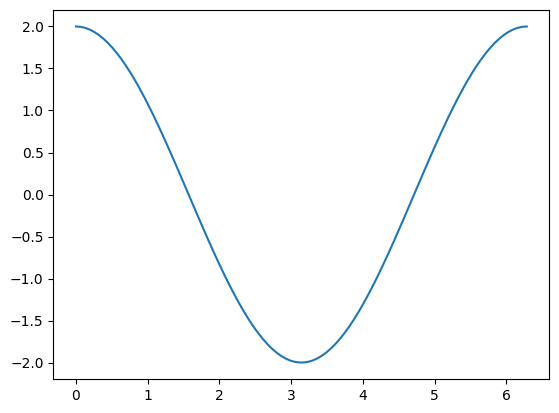

In [138]:
# Good. But how can we be sure that the derivatives were generated just right?

# Calling the backward function
out.backward()

# And then checking out the generated derivatives values
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Adding a constant, as we did to compute d, does not change the derivative. That leaves c = 2∗b = 2∗sin⁡(a), the derivative of which should be 2∗cos⁡(a). Looking at the graph above, that’s just what we see.

Be aware that only leaf nodes of the computation have their gradients computed. If you tried, for example, print(c.grad) you’d get back None. In this simple example, only the input is a leaf node, so only it has gradients computed.

# More examples on gradients

In [140]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

# Until now no gradients were calculated:

In [143]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad) # Shows the gradients

tensor([-0.0114, -0.0516, -0.0005, -0.0441,  0.0049, -0.0651, -0.0450,  0.0062,
         0.0370, -0.0053], grad_fn=<SliceBackward0>)
None


# Lets change it

In [145]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # SGD stochastic gradient descent optimizer.
prediction = model(some_input) # forward pass

loss = (ideal_output - prediction).pow(2).sum() # loss: Euclidian distance
print(loss)

tensor(155.0234, grad_fn=<SumBackward0>)


In [147]:
# Note that still there is no gradient
print(model.layer2.weight.grad) # Shows the gradients

None


## The gradients are created when the backwards pass get calculated

In [150]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0114, -0.0516, -0.0005, -0.0441,  0.0049, -0.0651, -0.0450,  0.0062,
         0.0370, -0.0053], grad_fn=<SliceBackward0>)
tensor([-2.1624, -0.0643, -4.5088, -1.0345,  3.3013, -0.2757,  2.2550, -2.6771,
         2.5618,  0.4986])


We can see that the gradients have been computed for each learning weight, but the weights remain unchanged, because we haven’t run the optimizer yet. The optimizer is responsible for updating model weights based on the computed gradients.

In [151]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0092, -0.0515,  0.0040, -0.0431,  0.0016, -0.0648, -0.0472,  0.0089,
         0.0345, -0.0058], grad_fn=<SliceBackward0>)
tensor([-2.1624, -0.0643, -4.5088, -1.0345,  3.3013, -0.2757,  2.2550, -2.6771,
         2.5618,  0.4986])


One important thing about the process: After calling optimizer.step(), you need to call optimizer.zero_grad(), or else every time you run loss.backward(), the gradients on the learning weights will accumulate. Failing to zero the gradients before running your next training batch will cause the gradients to blow up in this manner, causing incorrect and unpredictable learning results.

In [152]:
optimizer.zero_grad(set_to_none=False)

In [153]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0092, -0.0515,  0.0040, -0.0431,  0.0016, -0.0648, -0.0472,  0.0089,
         0.0345, -0.0058], grad_fn=<SliceBackward0>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In-place operations throws exceptions when applied to tensors with autograd

In [157]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

# Autograd Profiler

In [158]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        50.67%       2.383ms        50.67%       2.383ms       2.383us          1000  
    aten::mul        49.33%       2.320ms        49.33%       2.320ms       2.320us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 4.703ms



STAGE:2023-11-02 21:48:39 77234:77234 ActivityProfilerController.cpp:312] Completed Stage: Warm Up
STAGE:2023-11-02 21:48:39 77234:77234 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-11-02 21:48:39 77234:77234 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


# Jacobian matrices

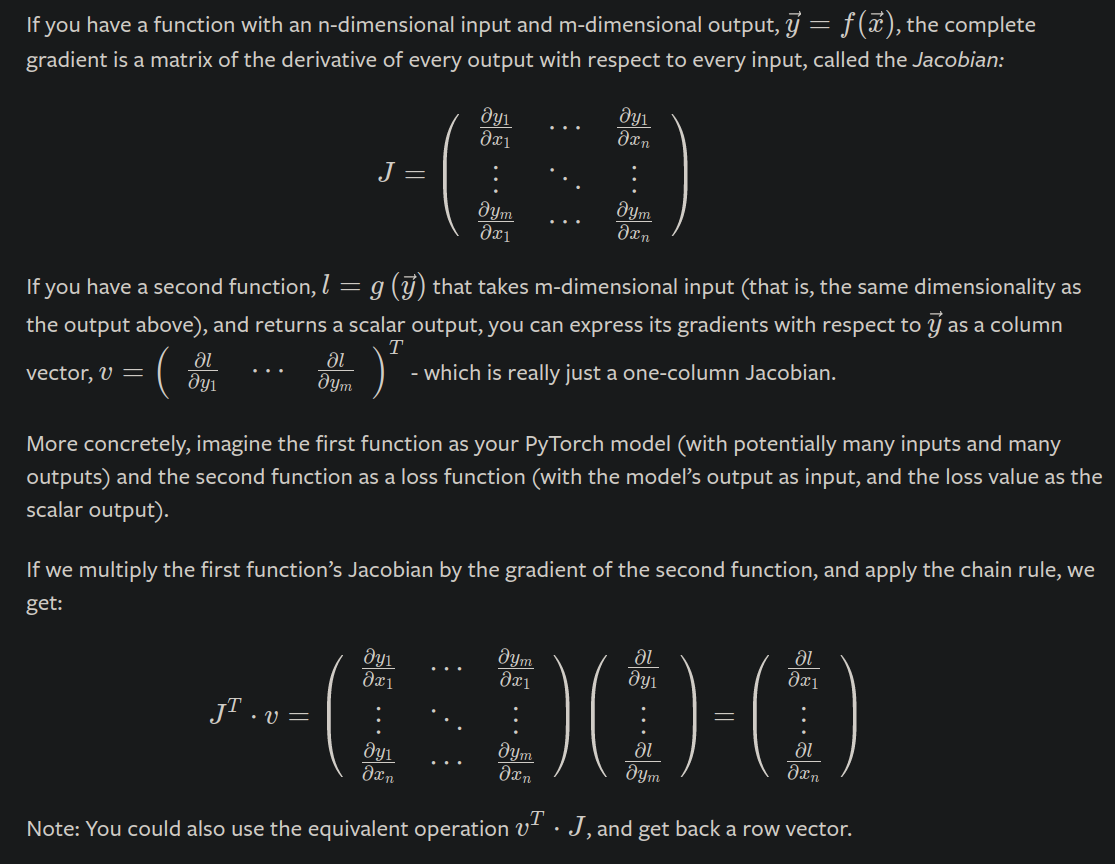

Note: You could also use the equivalent operation $v^T⋅J$, and get back a row vector.

The resulting column vector is the gradient of the second function with respect to the inputs of the first - or in the case of our model and loss function, the gradient of the loss with respect to the model inputs.

``torch.autograd`` is an engine for computing these products. This is how we accumulate the gradients over the learning weights during the backward pass.

In [161]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-624.7406,  -81.7708,  983.8554], grad_fn=<MulBackward0>)


In [163]:
# We CANNOT caculate the gradients from multidimensional outputs, this is possible just using scalars
# If we try, the error bellow occurs
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

# Now lets calculate the numeric values of a jacobian matrix using pytorch

Being the inputs 1 and 2 and the derivative with respect to x $2e^x$ and to y $3$ we have:

In [169]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.tensor(1.), torch.tensor(2.)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor(1.), tensor(2.))


(tensor(5.4366), tensor(3.))

$2.e^1$ and $3$